In [1]:
import numpy as np
import pandas as pd
import time
import warnings
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed(8)
warnings.filterwarnings("ignore")

In [2]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [3]:
file_loc = 'loan_prediction.csv'

In [4]:
df = pd.read_csv(file_loc)

In [5]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [6]:
df.shape

(614, 6)

In [7]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [8]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
X = df.iloc[:,0:len(df.columns)-1].values
Y = df.iloc[:,-1].values

In [10]:
X.shape

(614, 5)

In [11]:
Y.shape

(614,)

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [13]:
X_train.shape

(460, 5)

In [14]:
X_test.shape

(154, 5)

In [15]:
scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='f1_macro')

In [16]:
scores.mean()

0.6209672366900477

In [17]:
# Fit the model
clf.fit(X_train, Y_train)
# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [18]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
train_cols = df.columns[0:len(df.columns)-1]

In [20]:
target_cols = df.columns[-1]

In [21]:
print('The Training F1 Score is', f1_score(train_predictions, Y_train))
print('The Testing F1 Score is', f1_score(test_predictions, Y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.7373271889400921


In [22]:
parameters = {'max_depth':[1,2,3,4,5], 
              'min_samples_leaf':[1,2,3,4,5], 
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score)

In [23]:
@timeit
def generate_clf_from_search(grid_or_random, clf, parameters, scorer, X, y):
    if grid_or_random == "Grid":
        search_obj = GridSearchCV(clf, parameters, scoring=scorer)
    elif grid_or_random == "Random":
        search_obj = RandomizedSearchCV(clf, parameters, scoring=scorer)
    fit_obj = search_obj.fit(X, y)
    best_clf = fit_obj.best_estimator_
    return best_clf, search_obj, fit_obj

In [24]:
best_clf_grid, search,fit = generate_clf_from_search("Grid", 
                                         clf, 
                                         parameters, 
                                         scorer, 
                                         X_train, 
                                         Y_train)

'generate_clf_from_search'  1269.02 ms


In [25]:
fit.cv_results_['params'][0]

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [26]:
fit.cv_results_['mean_test_score'][0]

0.8356047177376769

In [27]:
len(fit.cv_results_['mean_test_score'])

200

In [28]:
out_f1_values = fit.cv_results_['mean_test_score']

In [29]:
out_f1_values.sort()

In [30]:
out_f1_values

array([0.78865938, 0.78865938, 0.79070395, 0.79070395, 0.79070395,
       0.79070395, 0.79138203, 0.79143524, 0.7923002 , 0.79568841,
       0.7962276 , 0.79679979, 0.79716658, 0.79731269, 0.79731269,
       0.79860787, 0.79932021, 0.79932021, 0.80022053, 0.8012156 ,
       0.80507363, 0.80507363, 0.80507363, 0.80507363, 0.80671708,
       0.80739729, 0.80739729, 0.80749613, 0.80750988, 0.80869565,
       0.80869565, 0.80869565, 0.80967395, 0.80967395, 0.80967395,
       0.80990968, 0.80990968, 0.81048593, 0.81048593, 0.8105899 ,
       0.8105899 , 0.81094531, 0.81177273, 0.81177273, 0.81181327,
       0.81181327, 0.81181327, 0.81181327, 0.81246582, 0.81246582,
       0.81253712, 0.81253712, 0.81253712, 0.81253712, 0.81260059,
       0.81260059, 0.81260059, 0.81260059, 0.81310697, 0.81310697,
       0.81310697, 0.81319416, 0.81319416, 0.81365949, 0.81365949,
       0.81365949, 0.81383531, 0.81436147, 0.81436147, 0.81436147,
       0.81436147, 0.81622428, 0.81622428, 0.81622428, 0.81622

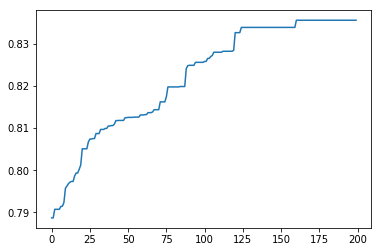

In [31]:
plt.plot(out_f1_values)

In [32]:
r_values = np.random.choice(out_f1_values, 61, replace=False)

In [33]:
r_values[r_values > 0.83390239]

array([0.83560472, 0.83560472, 0.83560472, 0.83560472, 0.83560472,
       0.83560472, 0.83560472, 0.83560472, 0.83560472, 0.83560472])

In [34]:
r_values

array([0.82800352, 0.8105899 , 0.83560472, 0.82823829, 0.80750988,
       0.83390239, 0.81365949, 0.83560472, 0.81976757, 0.83560472,
       0.83390239, 0.82800352, 0.79138203, 0.80739729, 0.8105899 ,
       0.80990968, 0.82800352, 0.81622428, 0.81622428, 0.82800352,
       0.81048593, 0.83390239, 0.81976757, 0.82823829, 0.80869565,
       0.83560472, 0.81976757, 0.83560472, 0.83390239, 0.82823829,
       0.81181327, 0.83560472, 0.82490084, 0.82582674, 0.81177273,
       0.83390239, 0.81181327, 0.81976757, 0.81622428, 0.83390239,
       0.81976757, 0.83560472, 0.83390239, 0.83390239, 0.81383531,
       0.80507363, 0.78865938, 0.82800352, 0.81253712, 0.83390239,
       0.83390239, 0.83560472, 0.83390239, 0.79143524, 0.83560472,
       0.81986483, 0.8012156 , 0.83560472, 0.81310697, 0.79932021,
       0.824117  ])

In [35]:
scores = cross_val_score(best_clf_grid, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7056824255406972

In [36]:
best_clf_grid.fit(X_train, Y_train)
# Make predictions using the new model.
best_train_predictions = best_clf_grid.predict(X_train)
best_test_predictions = best_clf_grid.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.8360902255639098
The testing F1 Score is 0.8620689655172413


In [37]:
best_clf_random, _, _ = generate_clf_from_search("Random", 
                                           clf, 
                                           parameters, 
                                           scorer, 
                                           X_train, 
                                           Y_train)

'generate_clf_from_search'  80.94 ms


In [38]:
scores = cross_val_score(best_clf_random, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7056824255406972

In [39]:
best_clf_random.fit(X_train, Y_train)
# Make predictions using the new model.
best_train_predictions = best_clf_random.predict(X_train)
best_test_predictions = best_clf_random.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.8360902255639098
The testing F1 Score is 0.8620689655172413
